### Graduate Rotational Internship Program : SPARKS FOUNDATION - : TASK - 6 .


 

##### Name: Kumar Ankit

##### Domain: Data Science and Business Analytics.

##### Task 6: Create the Decision Tree classifier and visualize it graphically.

##### Purpose: The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

##### Level: Intermediate


### First : Importing All Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import os
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

### Second : Reading Dataset to Jupiter Notebook :

In [2]:
pd.read_csv('E:\Iris.1.csv')
print("Data imported Successfully")

Data imported Successfully


In [3]:
data = pd.read_csv('E:\Iris.1.csv')
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Information about the Dataset


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


##### The above data shows us that there are No Null values in the Dataset.

##### Satistical Information about the Dataset

##### Only Numerical Columns get included.



In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:

# Putting Response variable to y

Y=data['Species']

In [7]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [8]:
# Putting feature variable to X 

X=data.drop(['Species','Id'],axis=1)

In [9]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##### Library for Train-Test Split



In [10]:
from sklearn.model_selection import train_test_split

##### Doing the Train-Test Split


In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.5,random_state=42)
X_train.shape,X_test.shape

((75, 4), (75, 4))

### A.) Decision Tree without any Hyperparameter Tuning

In [12]:
# Fitting the Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

#Instantiating the Fit

dt.fit(X_train,y_train)

DecisionTreeClassifier()

##### Importing the Required Packages for VIsualization of DT's



In [13]:
!pip install pydotplus

In [14]:
!pip install graphviz


In [15]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [16]:
# Importing the Required Packages for VIsualization of DT's

from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

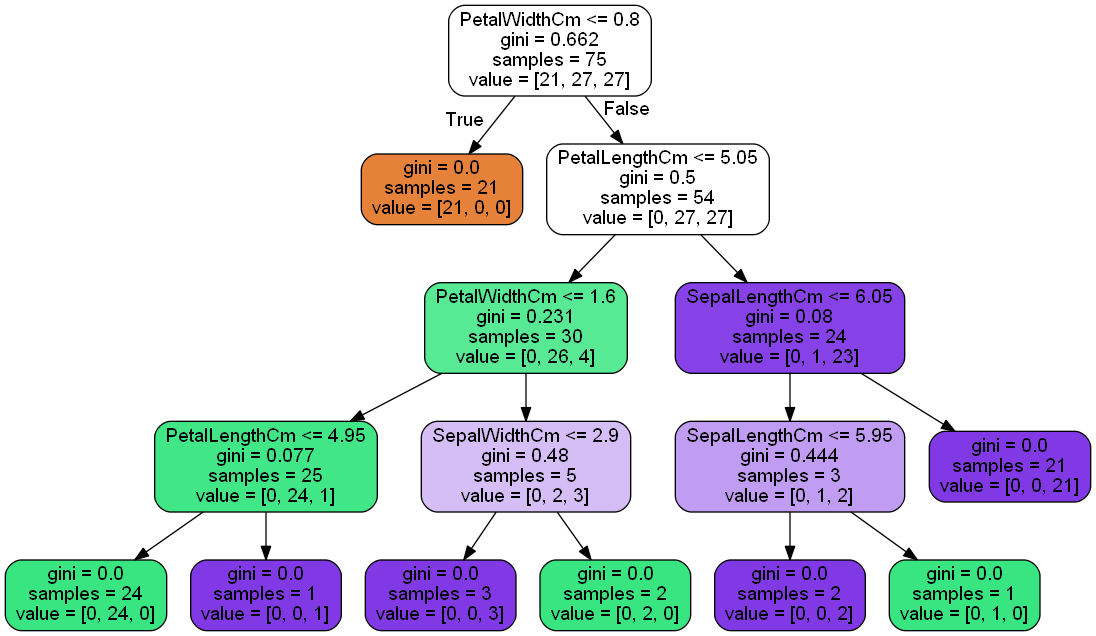

In [17]:
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#####  Evaluating Model Performance



In [19]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [21]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[21,  0,  0],
       [ 0, 27,  0],
       [ 0,  0, 27]], dtype=int64)

In [22]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9733333333333334


array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  2, 21]], dtype=int64)

### For the Above model we can see that if we don't provide any kind of parameters such as: Depth of the Tree

     

##### 1.Minimum Samples Split

##### 2.Minimum Samples at Leaf Node

##### 3.Criterion-Gini Index or Entropy

##### 4.Depth of the treees

##### The Model seems to overfit on the Training data by memorizing all the data points and has become more complex by having a high variance and a low bias.

##### Standard Code to display the Train and Test Accuracy together.


In [23]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

##### B.) Using GridSearch CV technique for Hyperparameter tuning

In [24]:
dt=DecisionTreeClassifier(random_state=42)

In [25]:
# Importing The Necessary Library
from sklearn.model_selection import GridSearchCV

In [26]:
params={
        'max_depth':[2,3,5,10],
        'min_samples_leaf':[5,10,20,50],
        'min_samples_split':[10,20,30,40],
        'criterion':['gini','entropy']
}

In [27]:
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring='accuracy')

In [28]:
# Instantiating the Fit

grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 128 candidates, totalling 512 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 512 out of 512 | elapsed:    4.1s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [10, 20, 30, 40]},
             scoring='accuracy', verbose=1)

### So,here we have got around 96 fits because:

#####     CV=4

##### 1. Max_depth Params=4

##### 2. Min_samples_leaf params=4

##### 3. Min_samples_split=4

##### 4. Critierion=2

##### 5. This implies 4 4 4 4 2=512 fits

In [29]:
# Each Row Here reresents the Different combinations we tried.

cv_data=pd.DataFrame(grid_search.cv_results_)
cv_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005327,0.002138,0.005121,0.001724,gini,2,5,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.789474,0.894737,0.947368,0.833333,0.866228,0.059937,1
1,0.005328,0.004441,0.004241,0.002406,gini,2,5,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.789474,0.894737,0.947368,0.833333,0.866228,0.059937,1
2,0.006260,0.002321,0.002483,0.000973,gini,2,5,30,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.789474,0.894737,0.947368,0.833333,0.866228,0.059937,1
3,0.005504,0.001553,0.002554,0.001179,gini,2,5,40,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.526316,0.894737,0.947368,0.833333,0.800439,0.163329,57
4,0.005368,0.002032,0.004276,0.001933,gini,2,10,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.789474,0.894737,0.947368,0.833333,0.866228,0.059937,1


In [30]:
# Shape of the set

cv_data.shape

(128, 16)

In [31]:
grid_search.best_score_

0.8662280701754386

In [32]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [33]:
dt_best=grid_search.best_estimator_

In [34]:
evaluate_model(dt_best)

Train Accuracy : 0.9333333333333333
Train Confusion Matrix:
[[21  0  0]
 [ 0 26  1]
 [ 0  4 23]]
--------------------------------------------------
Test Accuracy : 0.9333333333333333
Test Confusion Matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  5 18]]


#### The Above Dataset has given us a Model were we have achieved a good accuracy of 0.93 on both Train and Test set.

##### This why it is important to tune our model by providing some hyperparameters in it.

##### Since, the no. of data points available to us in this dataset our limited that is why it is important to select the train test data split carefully.

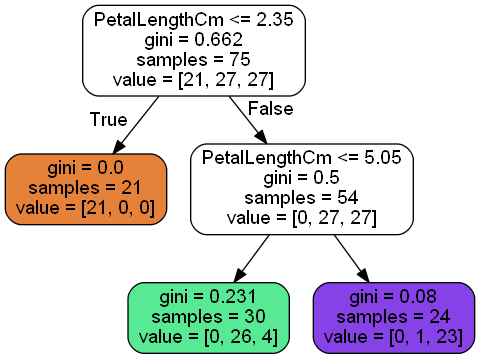

In [35]:
# Decision Tree for our Best Model
dot_data = StringIO()  

export_graphviz(dt_best, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

##### 1. This Tree is having a Max depth of 2

##### 2.Minimum Samples at Leaf Node are 5.

##### 3.Minimum Samples Required to split the Node are 10.